En esta práctica vamos a generar una secuencia de valores pesos de diferentes hombres.

Tienes que, usando las librerías vistas en este tema y google collab, mostrar:

* Media, mediana y rangos.
* Desviación estándar muestral.
* Dibujar distribución de datos e histograma.
* Buscar outliers (con los dos métodos) y observaciones influyentes (si las hay).
* Estandarizar los datos de las tres formas que se han visto.

A continuación tenéis el código con el que debéis comenzar vuestra práctica.



In [41]:
import numpy as np
import pandas as pd
import scipy.stats as st

# Generación de datos
# ==============================================================================
mu, sigma = 75, 15 # media y desviación típica de la población
# Generamos una muestra de tamaño 500
np.random.seed(1)
datos = np.random.normal(mu, sigma, 500)
# Cambiamos los valores de dos datos para convertirlos en outliers
datos[50]=100
datos[75]=1
datos[150]=250
datos[300]=-10
datos

array([ 99.36518045,  65.8236538 ,  67.07742372,  58.90547067,
        87.98111444,  40.47691955, 101.17217646,  63.58189649,
        79.78558644,  71.25944437,  96.93161906,  44.09788936,
        70.16374194,  69.23918468,  92.00654164,  58.50163099,
        72.41357689,  61.83212373,  75.6332062 ,  83.74222821,
        58.49071234,  92.17085565,  88.52386081,  82.53741508,
        88.51283924,  64.74408211,  73.15664662,  60.96345849,
        70.98167881,  82.955332  ,  64.62508872,  69.0486971 ,
        64.6924095 ,  62.32191538,  64.93130804,  74.81003102,
        58.24034477,  78.51623547,  99.89703266,  86.13066241,
        72.12246671,  61.68556554,  63.79262559, 100.38681902,
        75.76211632,  65.4450653 ,  77.86373227, 106.50382705,
        76.80238429,  84.25804665, 100.        ,  69.7162523 ,
        57.86222703,  69.75985916,  71.8665865 ,  83.79934787,
        87.58475121,  88.96653122,  79.28380988,  88.27711746,
        63.68403089,  93.79302233,  82.69394731,  70.52

**1. Calculamos la media, mediana y los rangos.**

In [42]:
media = np.mean(datos)
mediana = np.median(datos)
rango = np.ptp(datos)

print(f"La media es: {media}")
print(f"La mediana es: {mediana}")
print(f"El rango es: {rango}")

La media es: 75.88254434431963
La mediana es: 75.58180382827763
El rango es: 260.0


**2. Ahora calcularemos la desviación estándar muestral.**

In [43]:
desviacion_estandar_muestral = np.std(datos, ddof=1)
# La opción ddof=1 ajusta la fórmula para calcular la desviación estándar
# muestral en lugar de la desviación estándar poblacional.
# Una parte por n y otra por (n-1)

print(f"La desviación estándar muestral es: {desviacion_estandar_muestral}")

La desviación estándar muestral es: 17.44545430143048


**3. Ahora dibujaremos su distribución de datos y su histograma.**

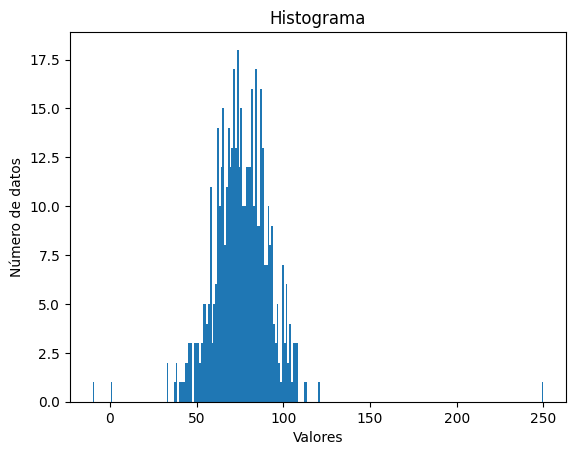

,0
0,99.365180
1,65.823654
2,67.077424
3,58.905471
4,87.981114
...,...
495,62.570580
496,82.933196
497,41.443702
498,58.384312


In [44]:
# Usaremos la biblioteca matplotlib para realizar visualizaciones
import matplotlib.pyplot as plt

# Dibujar el Histograma
plt.hist(datos, 250)
plt.ylabel('Número de datos')
plt.xlabel('Valores')
plt.title('Histograma')
plt.show()

# Distribución de datos
df = pd.DataFrame(data = datos)
df

**4. Buscar outliers (con los dos métodos) y observaciones influyentes (si las hay**)

Método 1: Probabilidad Global

In [45]:
# Primer Método: asumiendo una distribución normal de las variables.

# Método 1

## Criterio 1: Probabilidad Global
# Probabilidad de la muestra de estar dentro de las bandas
p_g = 0.95

# probabilidad global de una cola
alfa_g = (1-p_g)/2

# probabilidad de las colas para un solo dato
alfa = 1-(1-alfa_g)**(1/len(datos))

## Criterio 2: Método Chauvenet

#alfa = 1/(2*len(datos))
Z_alfa = st.norm.ppf(1-alfa/2)

# Impresión de resultados
alfa = round(alfa, 5)
Z_alfa = round(Z_alfa, 5)
print(f" Alfa = {alfa}")
print(f" CUANTIL Z_(1-alfa/2) = {Z_alfa}")


 Alfa = 5e-05
 CUANTIL Z_(1-alfa/2) = 4.05268


In [46]:
# Cálculo de las bandas
xL = round(np.mean(datos) - Z_alfa * np.std(datos), 4)
xU = round(np.mean(datos) + Z_alfa * np.std(datos), 4)
print(f" Banda = [{xL}, {xU}]")

 Banda = [5.2524, 146.5127]


In [47]:
# Mostrar datos
for i in range(len(datos)):
    if datos[i] < xL  or datos[i] > xU:
        print(f" El dato[{i}] = {datos[i]} es un outlier")

 El dato[75] = 1.0 es un outlier
 El dato[150] = 250.0 es un outlier
 El dato[300] = -10.0 es un outlier


Método 2: Rangos Intercuartiles (IQR)

In [48]:
# Método de IQR para indentificar outliers
Q1 = np.quantile(datos, 0.25)
Q3 = np.quantile(datos, 0.75)
IQR = Q3 - Q1
k = 3
xL = Q1 - k * IQR
xU = Q3 + k * IQR
print(f"Bandas: [{xL},{xU}]")
for i in  range(len(datos)):
    if datos[i] < xL  or datos[i]>xU:
        print(f" El dato[{i}]={datos[i]} es un outlier")

Bandas: [4.402207827140614,147.48191492762493]
 El dato[75]=1.0 es un outlier
 El dato[150]=250.0 es un outlier
 El dato[300]=-10.0 es un outlier


Ahora detectaremos si hay casos influyentes sobre la media

In [49]:
# Detectamos los outlier de phi(Valores Influyentes.)
phi = np.zeros(len(datos))
for i in range(len(datos)):
  datos_aux = datos
  datos_sin_i = np.delete(datos_aux, i)
  phi[i] = np.mean(datos_sin_i)
phi

array([75.83548495, 75.90270244, 75.90018988, 75.91656654, 75.85829871,
       75.9534975 , 75.83186372, 75.90719494, 75.87472262, 75.89180907,
       75.84036183, 75.94624105, 75.89400487, 75.89585769, 75.85023172,
       75.91737583, 75.88949618, 75.9107015 , 75.88304402, 75.86679347,
       75.91739772, 75.84990244, 75.85721104, 75.86920793, 75.85723313,
       75.90486591, 75.88800707, 75.91244231, 75.89236572, 75.86837042,
       75.90510438, 75.89623943, 75.90496946, 75.90971995, 75.90449071,
       75.88469367, 75.91789945, 75.87726641, 75.83441912, 75.86200703,
       75.89007957, 75.9109952 , 75.90677264, 75.83343758, 75.88278568,
       75.90346114, 75.87857403, 75.82117905, 75.88070098, 75.86575977,
       75.83421277, 75.89490164, 75.9186572 , 75.89481425, 75.89059236,
       75.86667901, 75.85909303, 75.85632393, 75.87572818, 75.85770552,
       75.90699026, 75.8466516 , 75.86889424, 75.89327368, 75.86962806,
       75.88658467, 75.85029605, 75.83862709, 75.81861431, 75.92

In [50]:
Q1 = np.quantile(phi, 0.25)
Q3 = np.quantile(phi, 0.75)
IQR = Q3 - Q1
xL=Q1 - 3 * IQR
xU=Q3 + 3 * IQR
for i in  range(len(datos)):
        if phi[i] < xL  or phi[i]>xU:
          print(f" El dato [{i}] = {datos[i]} es una observación influyente para la media")

# se ha cambiado a 3 en vez de 1 y medio porque salían más datos influyentes

 El dato [75] = 1.0 es una observación influyente para la media
 El dato [150] = 250.0 es una observación influyente para la media
 El dato [300] = -10.0 es una observación influyente para la media


**5. Estandarizar los datos de las tres formas que se han visto.**

Método 1: Estandarización por Rangos

In [51]:
# Estandarización por Rangos
min_valor = np.min(datos)
max_valor = np.max(datos)

# fórmula sería: dato_original-valor_min/rango(valor_max-valor_min)
datos_estandarizados = (datos - min_valor) / (max_valor - min_valor)

# Mostrar los resultados
print("Datos originales:")
print(datos[:10])  # Mostrar solo los primeros 10 valores
print("\nDatos estandarizados por rangos:")
print(datos_estandarizados[:10])  # Mostrar solo los primeros 10 valores

Datos originales:
[ 99.36518045  65.8236538   67.07742372  58.90547067  87.98111444
  40.47691955 101.17217646  63.58189649  79.78558644  71.25944437]

Datos estandarizados por rangos:
[0.42063531 0.29162944 0.29645163 0.26502104 0.37685044 0.194142
 0.42758529 0.28300729 0.34532918 0.31253632]


Método 2: Z-score estandarización

In [52]:
# Z-score estandarización
media = np.mean(datos)
desviacion_estandar = np.std(datos)

datos_estandarizados_zscore = (datos - media) / desviacion_estandar

# Mostrar resultados
print("Datos originales:")
print(datos[:10])  # Mostrar solo los primeros 10 valores
print("\nDatos estandarizados por Z-score:")
print(datos_estandarizados_zscore[:10])  # Mostrar solo los primeros 10 valores

Datos originales:
[ 99.36518045  65.8236538   67.07742372  58.90547067  87.98111444
  40.47691955 101.17217646  63.58189649  79.78558644  71.25944437]

Datos estandarizados por Z-score:
[ 1.34740854 -0.57716838 -0.5052284  -0.97412632  0.69420301 -2.03153687
  1.45109203 -0.70579801  0.22395238 -0.26526853]


Método 3: Escalamiento Decimal

In [53]:
# Escalado decimal (min-max scaling)
min_valor1 = np.min(datos)
max_valor1 = np.max(datos)

# Fórmula sería: 10*((dato original-valor_min)/Rango(valor_max-valor_min))

rango1 = max_valor1 - min_valor1
datos_escala_decimal = 10 * ((datos - min_valor) / rango)

# Mostrar resultados
print("Datos originales:")
print(datos[:10])  # Mostrar solo los primeros 10 valores
print("\nDatos escalados decimalmente:")
print(datos_escala_decimal[:10])  # Mostrar solo los primeros 10 valores

Datos originales:
[ 99.36518045  65.8236538   67.07742372  58.90547067  87.98111444
  40.47691955 101.17217646  63.58189649  79.78558644  71.25944437]

Datos escalados decimalmente:
[4.20635309 2.91629438 2.9645163  2.65021041 3.7685044  1.94141998
 4.27585294 2.83007294 3.45329179 3.12536324]
